# Importing Required  libraries

In [23]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Analyzing Dataset


In [24]:
df = pd.read_csv('C:/Users/PythonTeam/Desktop/ELECTRICAL/Dataset-1_EV-charging-reports.csv')


In [25]:
df.columns

Index(['session_ID', 'Garage_ID', 'User_ID', 'User_type', 'Shared_ID',
       'Start_plugin', 'Start_plugin_hour', 'End_plugout', 'End_plugout_hour',
       'El_kWh', 'Duration_hours', 'month_plugin', 'weekdays_plugin',
       'Plugin_category', 'Duration_category'],
      dtype='object')

# DatasetPreprocessing

In [26]:
# Preprocessing - replace commas with periods in 'Duration_hours' and convert to float
df['Duration_hours'] = df['Duration_hours'].str.replace(',', '.').astype(float)

# Replace NaN values with zeros in the entire DataFrame
df.fillna(0, inplace=True)

# Convert 'Duration_category' to strings for classification
df['Duration_category'] = df['Duration_category'].astype(str)

# Selecting Features values & target values

In [27]:
# Define features and target
features = ['Start_plugin_hour', 'End_plugout_hour', 'Duration_hours']  # Add more features as needed
target = 'Duration_category'

In [28]:
X = df[features]
y = df[target]

# Split the data into training and testing sets

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Applying Ensemble Model 

In [38]:
knn = KNeighborsClassifier(n_neighbors=5)
rf = RandomForestClassifier(n_estimators=100, random_state=42)

In [39]:
ensemble_model = VotingClassifier(estimators=[('knn', knn), ('rf', rf)], voting='hard')


In [40]:
ensemble_model.fit(X_train, y_train)
ensemble_pred = ensemble_model.predict(X_test)
ensemble_accuracy = accuracy_score(y_test, ensemble_pred)
print("Ensemble Accuracy:", ensemble_accuracy)


Ensemble Accuracy: 0.9883720930232558


In [41]:
# Classification report
report = classification_report(y_test, predictions)
print("Classification Report:")
print(report)

Classification Report:
                         precision    recall  f1-score   support

                      0       1.00      1.00      1.00         7
Between 12 and 15 hours       0.97      0.97      0.97       199
Between 15 and 18 hours       0.96      0.95      0.96       139
  Between 3 and 6 hours       0.97      0.98      0.97       162
 Between 6 and 9  hours       0.97      0.95      0.96       100
 Between 9 and 12 hours       0.99      0.98      0.99       207
      Less than 3 hours       0.99      1.00      1.00       356
     More than 18 hours       0.98      0.99      0.99       206

               accuracy                           0.98      1376
              macro avg       0.98      0.98      0.98      1376
           weighted avg       0.98      0.98      0.98      1376



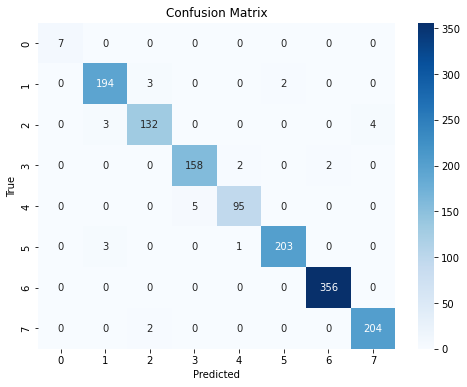

In [42]:
# Confusion matrix
conf_matrix = confusion_matrix(y_test, predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

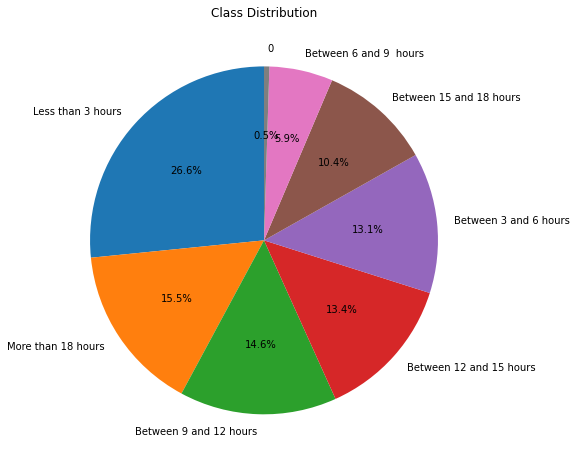

In [43]:
# Pie chart for class distribution
class_distribution = df['Duration_category'].value_counts()
plt.figure(figsize=(8, 8))
class_distribution.plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title('Class Distribution')
plt.ylabel('')
plt.show()

# KNN classifier model

In [33]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

In [34]:
# Initialize and train the KNN classifier
k = 5  # Example: You can change the number of neighbors (k) as needed
model = KNeighborsClassifier(n_neighbors=k)
model.fit(X_train, y_train)

KNeighborsClassifier()

In [35]:
predictions = model.predict(X_test)

# Calculate accuracy

In [36]:
# Calculate accuracy
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy}")

Accuracy: 0.9803779069767442


# Classification report

In [37]:
# Classification report
report = classification_report(y_test, predictions)
print("Classification Report:")
print(report)

Classification Report:
                         precision    recall  f1-score   support

                      0       1.00      1.00      1.00         7
Between 12 and 15 hours       0.97      0.97      0.97       199
Between 15 and 18 hours       0.96      0.95      0.96       139
  Between 3 and 6 hours       0.97      0.98      0.97       162
 Between 6 and 9  hours       0.97      0.95      0.96       100
 Between 9 and 12 hours       0.99      0.98      0.99       207
      Less than 3 hours       0.99      1.00      1.00       356
     More than 18 hours       0.98      0.99      0.99       206

               accuracy                           0.98      1376
              macro avg       0.98      0.98      0.98      1376
           weighted avg       0.98      0.98      0.98      1376



# Confusion matrix

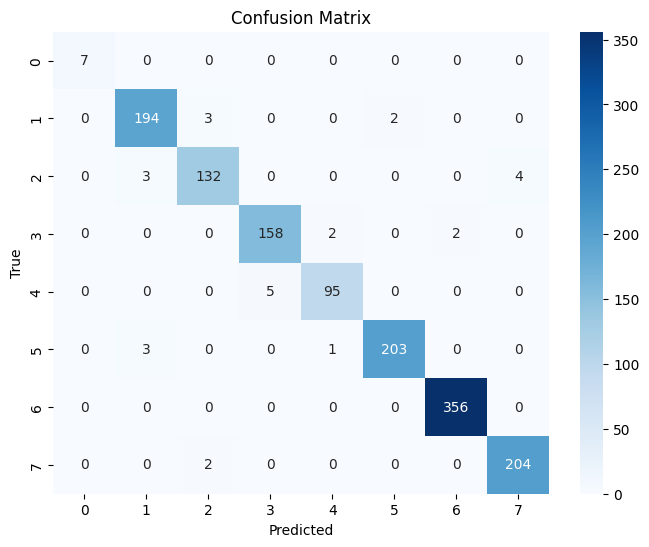

In [14]:
# Confusion matrix
conf_matrix = confusion_matrix(y_test, predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Pie chart

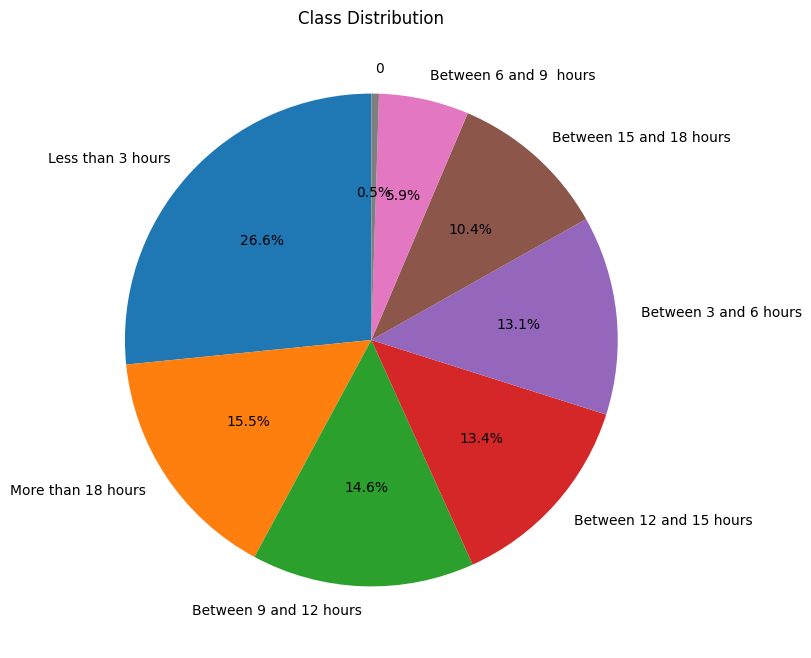

In [15]:
# Pie chart for class distribution
class_distribution = df['Duration_category'].value_counts()
plt.figure(figsize=(8, 8))
class_distribution.plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title('Class Distribution')
plt.ylabel('')
plt.show()

# Save Model

In [17]:
import pickle
with open('naive_bayes_model.pkl', 'wb') as file:
    pickle.dump(model, file)

# Navi Bayes Model

Accuracy: 0.9382267441860465
Classification Report:
                         precision    recall  f1-score   support

                      0       1.00      1.00      1.00         7
Between 12 and 15 hours       1.00      0.94      0.97       199
Between 15 and 18 hours       0.89      0.98      0.93       139
  Between 3 and 6 hours       0.92      0.91      0.92       162
 Between 6 and 9  hours       0.86      0.75      0.80       100
 Between 9 and 12 hours       0.89      0.96      0.92       207
      Less than 3 hours       0.97      0.98      0.98       356
     More than 18 hours       0.96      0.93      0.94       206

               accuracy                           0.94      1376
              macro avg       0.94      0.93      0.93      1376
           weighted avg       0.94      0.94      0.94      1376



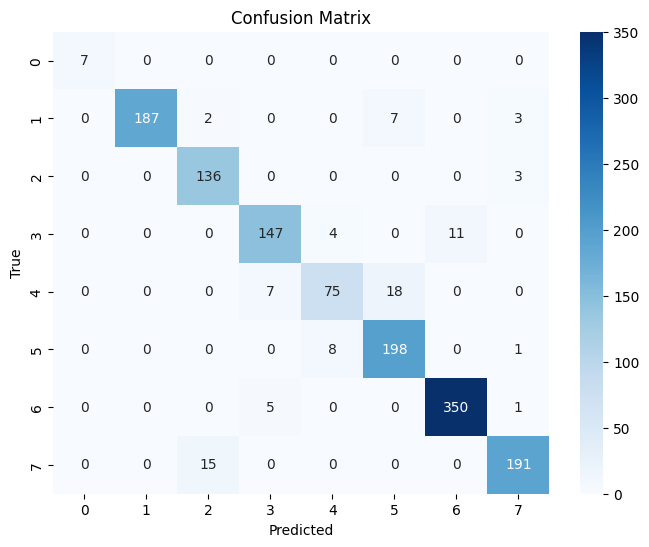

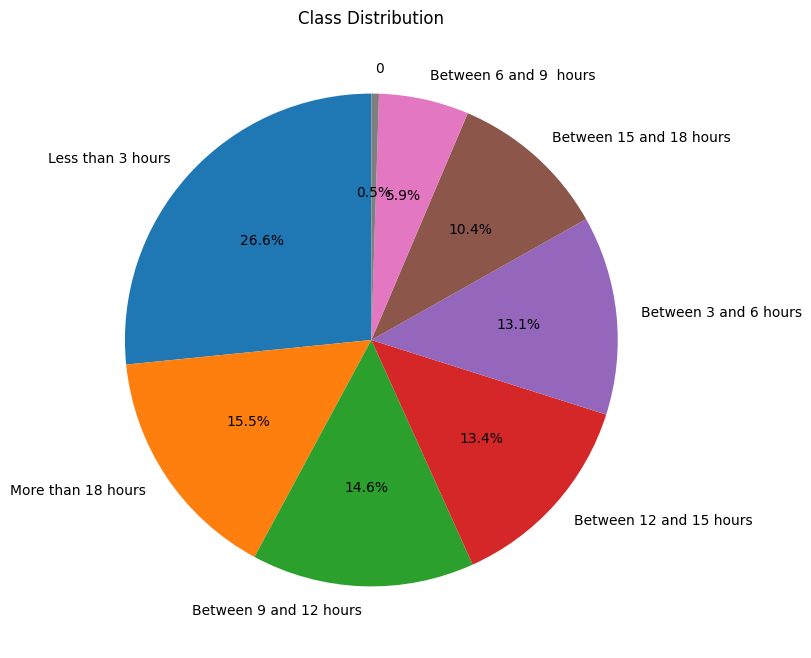

In [29]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train, y_train)

predictions = nb.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy}")

# Classification report
report = classification_report(y_test, predictions)
print("Classification Report:")
print(report)

# Confusion matrix
conf_matrix = confusion_matrix(y_test, predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Pie chart for class distribution (as you already have it)
# Displaying the pie chart for class distribution
class_distribution = df['Duration_category'].value_counts()
plt.figure(figsize=(8, 8))
class_distribution.plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title('Class Distribution')
plt.ylabel('')
plt.show()
